## Thermal remote sensing assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Spectral emissivity

In [2]:
# Import the data
fine_snow = np.loadtxt('Data/fine_snow.txt', skiprows=22)
fine_snow[:,1] = fine_snow[:,1]/100

coarse_snow = np.loadtxt('Data/coarse_snow.txt', skiprows=22)
coarse_snow[:,1] = coarse_snow[:,1]/100

ice =np.loadtxt('Data/ice.txt', skiprows=22) 
ice[:,1] = ice[:,1]/100

rock = np.loadtxt('Data/purple_banded_sandstone.txt', skiprows=22)
rock[:,1] = rock[:,1]/100

sea_water = np.loadtxt('Data/sea_water.txt', skiprows=22)
sea_water[:,1] = sea_water[:,1]/100

soil = np.loadtxt('Data/dark_reddish_brown_sandy_loam.txt', skiprows=22)
soil[:,1] = soil[:,1]/100

tap_water = np.loadtxt('Data/tap_water.txt', skiprows=22)
tap_water[:,1] = tap_water[:,1]/100

trees = np.loadtxt('Data/chorisia_insignis_(its_a_tree).txt', skiprows=22)
trees[:,1] = trees[:,1]/100


In [3]:
# Define equation 
def blackbody(T,wavelength):
    c=2.9979*10**8 #[m/s]
    k=1.38*10**(-23) #[Ws/K]
    h=6.626*10**(-34) #[W sec^2]

    #convert wavelength to meters
    wavelength=wavelength*10**(-6)

    S=((2*np.pi*h*c**2)/(wavelength**5))*(1/(np.exp(c*h/(wavelength*k*T))-1))
    
    return S

def spectral_emmitance(E,T,wavelength):
    # E is the radiant emmissivity of the material, emmitance = 1-reflectance = 1- data_you_want[:,1]

    black_body_S = blackbody(T,wavelength)
    emitance= E*black_body_S
    return(emitance)

def radiant_temperature(T_surface,wavelength):
    S=blackbody(T_surface,wavelength)
    steph_blotz = 5.669*10**(-8) #[W/(m^2 K^4)]
    rad_T=(S/steph_blotz)**(1/4)

    return(rad_T)

Spectral emissivity ice vs sea water

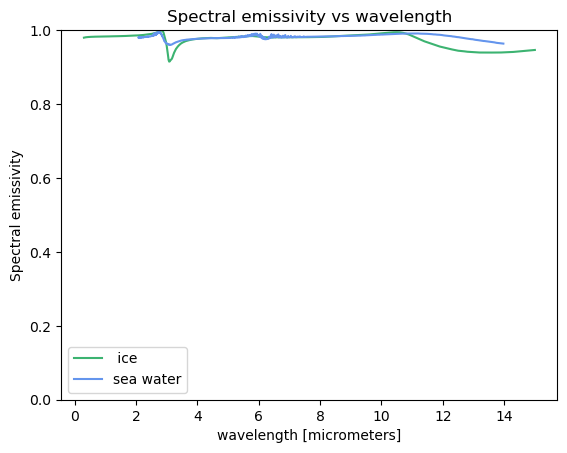

In [4]:
# Calculate the emissivity 
S_ice=1-ice[:,1]
S_sea_water=1-sea_water[:,1]

#Plotting
plt.figure()
plt.plot(ice[:, 0],S_ice , label=' ice', color='mediumseagreen')
plt.plot(sea_water[:,0], S_sea_water, label= 'sea water', color='cornflowerblue')
plt.xlabel('wavelength [micrometers]')
plt.ylabel('Spectral emissivity')
plt.title('Spectral emissivity vs wavelength')
plt.legend()
plt.ylim (0,1)
plt.show()

Spectral emissivity fine snow, coarse snow, ice and rock

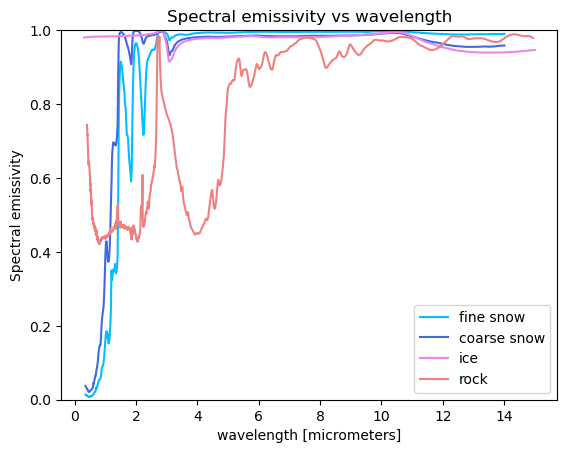

In [5]:
# Calculate the emissivity 
S_fine_snow=1-fine_snow[:,1]
S_coarse_snow=1-coarse_snow[:,1]
S_ice=1-ice[:,1]
S_rock=1-rock[:,1]

#Plotting
plt.figure()
plt.plot(fine_snow[:, 0],S_fine_snow , label='fine snow', color='deepskyblue')
plt.plot(coarse_snow[:, 0],S_coarse_snow , label='coarse snow', color='royalblue')
plt.plot(ice[:, 0],S_ice , label='ice', color='violet')
plt.plot(rock[:, 0],S_rock , label='rock', color='lightcoral')
plt.xlabel('wavelength [micrometers]')
plt.ylabel('Spectral emissivity')
plt.title('Spectral emissivity vs wavelength')
plt.legend()
plt.ylim (0,1)
plt.show()

Spectral emissivity soil, trees and tap water

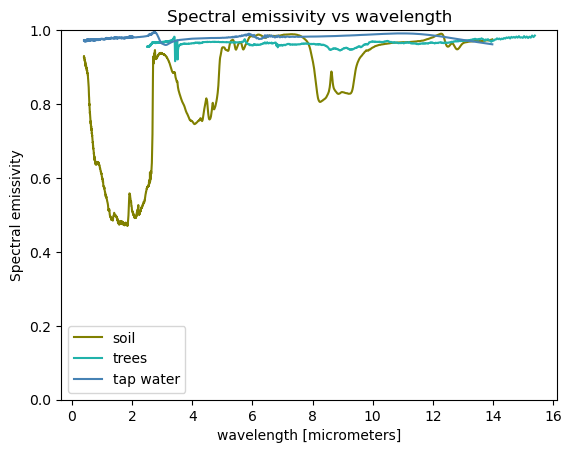

In [6]:
# Calculate the emissivity 
S_soil=1-soil[:,1]
S_trees=1-trees[:,1]
S_tap_water=1-tap_water[:,1]

#Plotting
plt.figure()
plt.plot(soil[:, 0],S_soil , label='soil', color='olive')
plt.plot(trees[:, 0],S_trees , label='trees', color='lightseagreen')
plt.plot(tap_water[:, 0],S_tap_water , label='tap water', color='steelblue')
plt.xlabel('wavelength [micrometers]')
plt.ylabel('Spectral emissivity')
plt.title('Spectral emissivity vs wavelength')
plt.legend()
plt.ylim (0,1)
plt.show()

### 2. Thermal remote sensing for identifying sea ice

Blackbody curves for sea water and ice

Text(0, 0.5, 'Spectral emittance [W m^-2 micrometer]')

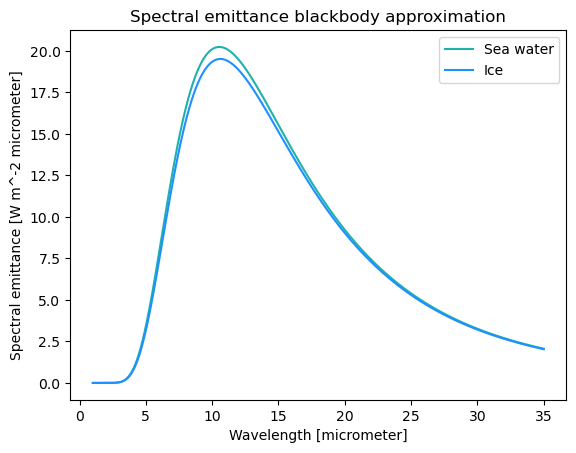

In [7]:
# Blackbody curves sea water and ice
wavelengths = np.linspace (1, 35, 50000)
seawater_bb = blackbody (275.15, wavelengths)*10**(-6)
ice_bb = blackbody (273.15, wavelengths)*10**(-6)

plt.plot (wavelengths, seawater_bb, label='Sea water', color='lightseagreen')
plt.plot (wavelengths, ice_bb, label='Ice', color='dodgerblue')
plt.legend ()
plt.title ('Spectral emittance blackbody approximation')
plt.xlabel ('Wavelength [micrometer]')
plt.ylabel ('Spectral emittance [W m^-2 micrometer]')

Spectral emittance of sea water and ice

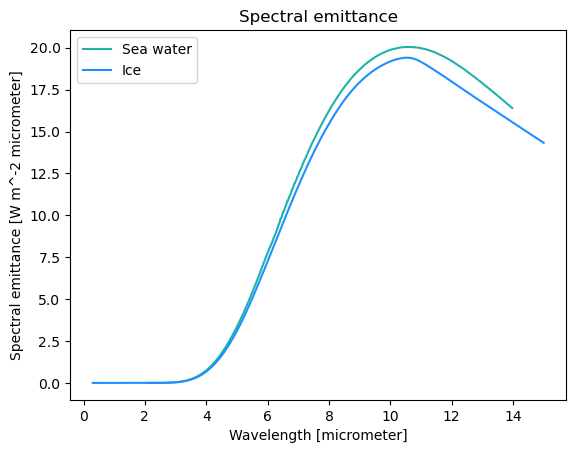

In [8]:
# Spectral emittance sea water and ice
E_seawater = 1 - sea_water[:,1]
E_ice = 1- ice[:,1]

spec_em_seawater = spectral_emmitance (E_seawater, 275.15, sea_water[:,0])*10**(-6)
spec_em_ice = spectral_emmitance (E_ice, 273.15, ice[:,0])*10**(-6)

plt.plot (sea_water[:,0], spec_em_seawater, label='Sea water', color='lightseagreen')
plt.plot (ice[:,0], spec_em_ice, label='Ice', color='dodgerblue')
plt.ylabel ('Spectral emittance [W m^-2 micrometer]')
plt.xlabel ('Wavelength [micrometer]')
plt.title ('Spectral emittance')
plt.legend ()

Text(0, 0.5, 'Spectral emittance [W m^-2 micrometer]')

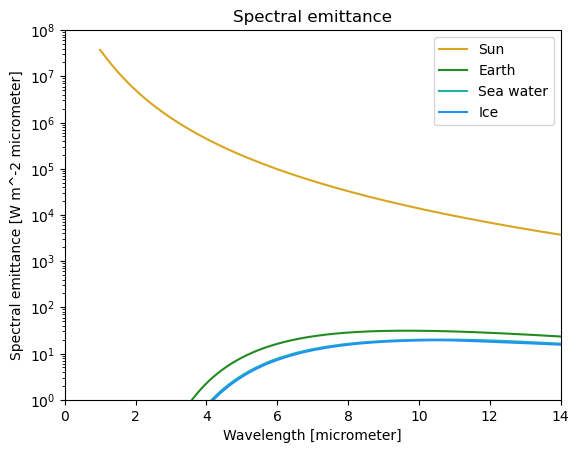

In [9]:
# Plot spectral emittance together with the blackbody curves of the sun and earth
sun = blackbody (6000, wavelengths)*10**(-6)
earth = blackbody (300, wavelengths)*10**(-6)

plt.plot (wavelengths, sun, label='Sun', color='goldenrod')
plt.plot (wavelengths, earth, label='Earth', color='forestgreen')
plt.plot (sea_water[:,0], spec_em_seawater, label='Sea water', color='lightseagreen')
plt.plot (ice[:,0], spec_em_ice, label='Ice', color='dodgerblue')
plt.legend ()
plt.yscale ('log')
plt.xlim (0, 14)
plt.ylim (1, 10**8)
plt.legend ()
plt.title ('Spectral emittance')
plt.xlabel ('Wavelength [micrometer]')
plt.ylabel ('Spectral emittance [W m^-2 micrometer]')

Text(0, 0.5, 'Spectral emittance [W m^-2 micrometer]')

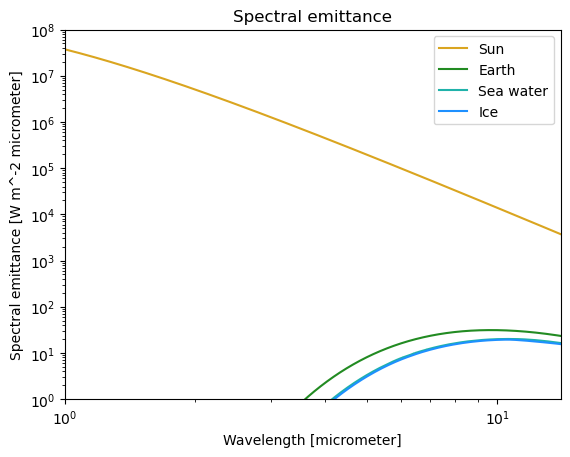

In [40]:
# Fuck around find out 
sun = blackbody (6000, wavelengths)*10**(-6)
earth = blackbody (300, wavelengths)*10**(-6)

plt.plot (wavelengths, sun, label='Sun', color='goldenrod')
plt.plot (wavelengths, earth, label='Earth', color='forestgreen')
plt.plot (sea_water[:,0], spec_em_seawater, label='Sea water', color='lightseagreen')
plt.plot (ice[:,0], spec_em_ice, label='Ice', color='dodgerblue')
plt.legend ()
plt.yscale ('log')
plt.xscale ('log')
plt.xlim (1, 14)
plt.ylim (1, 10**8)
plt.legend ()
plt.title ('Spectral emittance')
plt.xlabel ('Wavelength [micrometer]')
plt.ylabel ('Spectral emittance [W m^-2 micrometer]')

Largest difference in emittance

In [10]:
# Find the wavelength at which the difference is maximum
ice_wavelengths = ice[:,0]
seawater_wavelengths = sea_water[:,0]

# Trim the datasets to have the same interval 
mask1 = (seawater_wavelengths >= 6) & (seawater_wavelengths <= 13)
seawavelengths_trimmed = seawater_wavelengths[mask1]
spec_sea_trimmed = spec_em_seawater[mask1]

mask2 = (ice_wavelengths >= 6) & (ice_wavelengths <= 13)
icewavelengths_trimmed = ice_wavelengths[mask2]
spec_ice_trimmed = spec_em_ice[mask2]

# Interpolate ice dataset to match the size of the sea water dataset
from scipy.interpolate import interp1d
interp_func = interp1d(icewavelengths_trimmed, spec_ice_trimmed, kind='linear', fill_value="extrapolate")
spec_ice_interpolated = interp_func(seawavelengths_trimmed)

# Find the maximum difference and corresponding wavelength
difference = np.abs (spec_sea_trimmed - spec_ice_interpolated)
max_diff_index = np.argmax (difference)
max_dif_wavelength = seawavelengths_trimmed[max_diff_index]
spec_diff = difference[max_diff_index]

print ('The wavelength with the maximum difference is', max_dif_wavelength, 'micrometer')
print ('The maximum difference in spectral emittance is', spec_diff, 'W m^-2 micrometer')

The wavelength with the maximum difference is 12.2847 micrometer
The maximum difference in spectral emittance is 1.2488968158427376 W m^-2 micrometer


Radiant temperature at three different wavelengths for sea water and ice

In [11]:
# Define a function for the radiant temperature 
def rad_temp (epsilon, T_given):
    T = epsilon**(1/4) * T_given
    return T

# Find the emissivities at the given wavelengths
def epsilon (data, wavelength):
    index = min(range(len(data)), key=lambda i: abs(data[i][0] - wavelength))
    epsilon = 1 - data[index][1]
    return epsilon

ep_ice3 = epsilon (ice, 3.742)
ep_ice10 = epsilon (ice, 10.854)
ep_ice12 = epsilon (ice, 12.022)

ep_sea3 = epsilon (sea_water, 3.742)
ep_sea10 = epsilon (sea_water, 10.854)
ep_sea12 = epsilon (sea_water, 12.022)

# Radiant temperature at three central wavelengths for ice 
SLSTR3742_ice = rad_temp (ep_ice3, 273.15)
SLSTR10854_ice = rad_temp (ep_ice10, 273.15)
SLSTR12022_ice = rad_temp (ep_ice12, 273.15)

# Print the results for ice 
print(f'The radiant temperature for the 3742 nm wavelength for ice is {SLSTR3742_ice:.1f}', 'K')
print(f'The radiant temperature for the 10854 nm wavelength for ice is {SLSTR10854_ice:.1f}', 'K')
print(f'The radiant temperature for the 12022 nm wavelength for ice is {SLSTR12022_ice:.1f}', 'K')

# Radiant temperature at three central wavelengths for sea water 
SLSTR3742_sea = rad_temp (ep_sea3, 275.15)
SLSTR10854_sea = rad_temp (ep_sea10, 275.15)
SLSTR12022_sea = rad_temp (ep_sea12, 275.15)

# Print the results for sea water 
print(f'The radiant temperature for the 3742 nm wavelength for sea water is {SLSTR3742_sea:.1f}', 'K')
print(f'The radiant temperature for the 10854 nm wavelength for sea water is {SLSTR10854_sea:.1f}', 'K')
print(f'The radiant temperature for the 12022 nm wavelength for sea water is {SLSTR12022_sea:.1f}', 'K')



The radiant temperature for the 3742 nm wavelength for ice is 271.3 K
The radiant temperature for the 10854 nm wavelength for ice is 272.3 K
The radiant temperature for the 12022 nm wavelength for ice is 269.9 K
The radiant temperature for the 3742 nm wavelength for sea water is 273.4 K
The radiant temperature for the 10854 nm wavelength for sea water is 274.5 K
The radiant temperature for the 12022 nm wavelength for sea water is 274.2 K


Thermal emissivity to distinguish different landforms using thermal remote sensing

(0.0, 1.0)

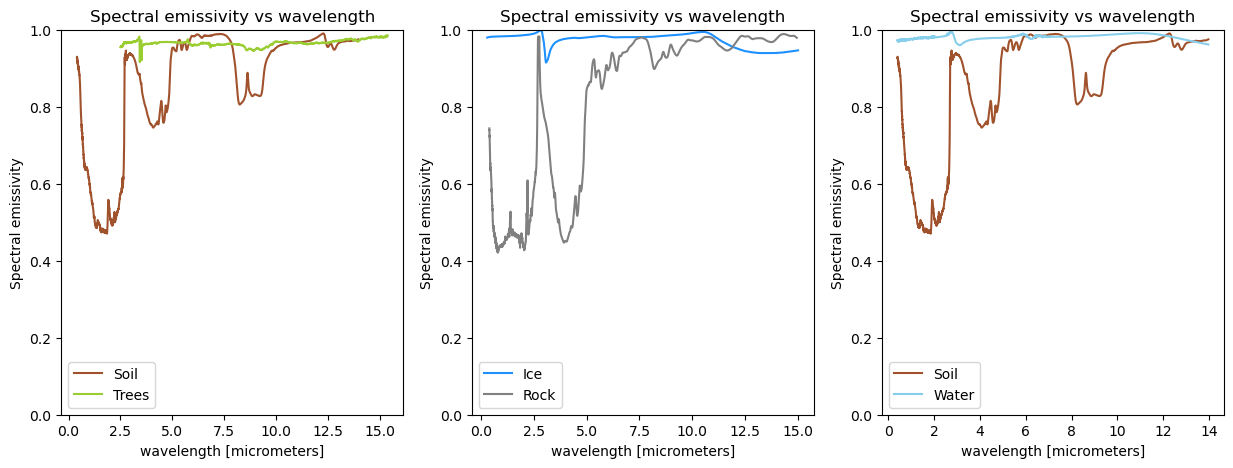

In [12]:
# Find the spectral emissivity of the landforms 
S_soil=1-soil[:,1]
S_trees=1-trees[:,1]
S_ice=1-ice[:,1]
S_rock=1-rock[:,1]
S_tapwater=1-tap_water[:,1]

# Plot the results 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

axes[0].plot(soil[:, 0],S_soil , label='Soil', color='sienna')
axes[0].plot(trees[:,0], S_trees, label= 'Trees', color='yellowgreen')
axes[0].set_xlabel('wavelength [micrometers]')
axes[0].set_ylabel('Spectral emissivity')
axes[0].set_title('Spectral emissivity vs wavelength')
axes[0].legend()
axes[0].set_ylim (0,1)

axes[1].plot(ice[:, 0],S_ice , label='Ice', color='dodgerblue')
axes[1].plot(rock[:,0], S_rock, label= 'Rock', color='grey')
axes[1].set_xlabel('wavelength [micrometers]')
axes[1].set_ylabel('Spectral emissivity')
axes[1].set_title('Spectral emissivity vs wavelength')
axes[1].legend()
axes[1].set_ylim (0,1)

axes[2].plot(soil[:, 0], S_soil, label='Soil', color='sienna')
axes[2].plot(tap_water[:,0], S_tap_water, label= 'Water', color='skyblue')
axes[2].set_xlabel('wavelength [micrometers]')
axes[2].set_ylabel('Spectral emissivity')
axes[2].set_title('Spectral emissivity vs wavelength')
axes[2].legend()
axes[2].set_ylim (0,1)

### 4. Exploiting temperature dynamics

In [13]:
#Lu et al
P_wet = 2e3 # Joules m^-2 C^1 s^1/2
P_dry = 0.5e3


#Diurnal heat capacity
def D_Price(P):
    D = np.sqrt(2*np.pi/86400)*P
    return D

#Surface Temperature 
# #Eq 4
def Surface_temp_Price_Eq_4(dS, V, a, D):
    T_var = 2*dS*V*(1-a) / D
    return T_var


In [14]:
dS = 0.5*300 # Amplitude of Solar variation or Net radiation values 
V = 0.75 # Atmospheric transmittance 
a = 0.25 # albedo

D_dry = D_Price(P_dry) # Diurnal heat capacity
T_var_dry = Surface_temp_Price_Eq_4(dS, 0.75, 0.25, D_dry)
print(f'The expected temperature variation is for dry soil is {T_var_dry:.4} C')

D_wet = D_Price(P_wet)
T_var_wet = Surface_temp_Price_Eq_4(dS, 0.75, 0.25, D_wet)
print(f'The expected temperature variation is for wet soil is {T_var_wet:.4} C')

#print(D_dry, D_wet)

The expected temperature variation is for dry soil is 39.58 C
The expected temperature variation is for wet soil is 9.894 C


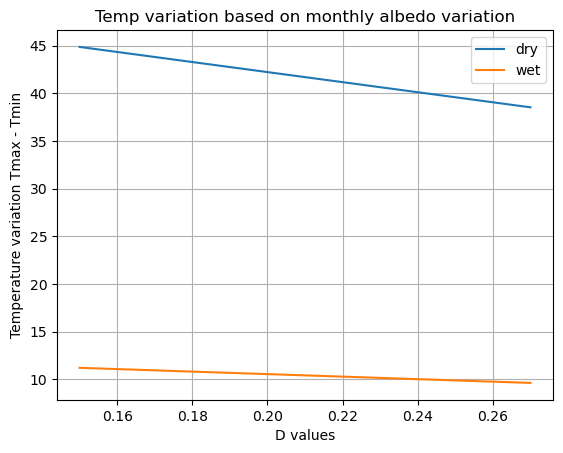

In [15]:
#P = np.linspace(0.5, 2, 10)*1000

P_wet = 2e3 # Joules m^-2 C^1 s^1/2
P_dry = 0.5e3

D_wet = D_Price(P_wet)
D_dry = D_Price(P_dry)
dS = 0.5*300

a = np.linspace(0.15, 0.27, 10)
T_a_var_dry = Surface_temp_Price_Eq_4(dS, 0.75, a, D_dry)
T_a_var_wet = Surface_temp_Price_Eq_4(dS, 0.75, a, D_wet)

plt.figure()
plt.plot(a, T_a_var_dry, label = 'dry')
plt.plot(a, T_a_var_wet, label = 'wet')
plt.xlabel('D values')
plt.ylabel('Temperature variation Tmax - Tmin')
plt.title('Temp variation based on monthly albedo variation')
plt.grid()
plt.legend()
plt.show()

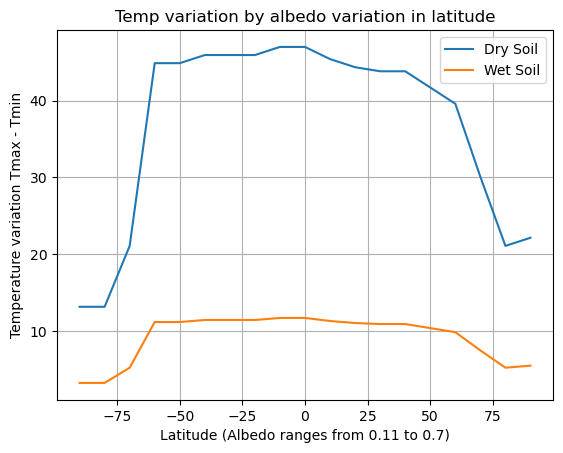

In [16]:
# latitude vs Albedo
dS = 0.5*300

lat = np.linspace(-90, 90, 19)
albedo_bylat = np.array([0.75, 0.75, 0.6, 0.15, 0.15, 0.13, 0.13, 0.13, 0.11, 0.11,
                0.14, 0.16, 0.17, 0.17, 0.21, 0.25, 0.43, 0.6, 0.58])

T_a_var_dry_l = Surface_temp_Price_Eq_4(dS, 0.75, albedo_bylat, D_dry)
T_a_var_wet_l = Surface_temp_Price_Eq_4(dS, 0.75, albedo_bylat, D_wet)

plt.figure()
plt.plot(lat, T_a_var_dry_l, label = 'Dry Soil')
plt.plot(lat, T_a_var_wet_l, label = 'Wet Soil')
plt.xlabel('Latitude (Albedo ranges from 0.11 to 0.7)')
plt.ylabel('Temperature variation Tmax - Tmin')
plt.title('Temp variation by albedo variation in latitude')
plt.grid()
plt.legend()
plt.show()

In [17]:
print(T_a_var_wet)

[11.21342765 11.03753074 10.86163384 10.68573694 10.50984003 10.33394313
 10.15804622  9.98214932  9.80625241  9.63035551]


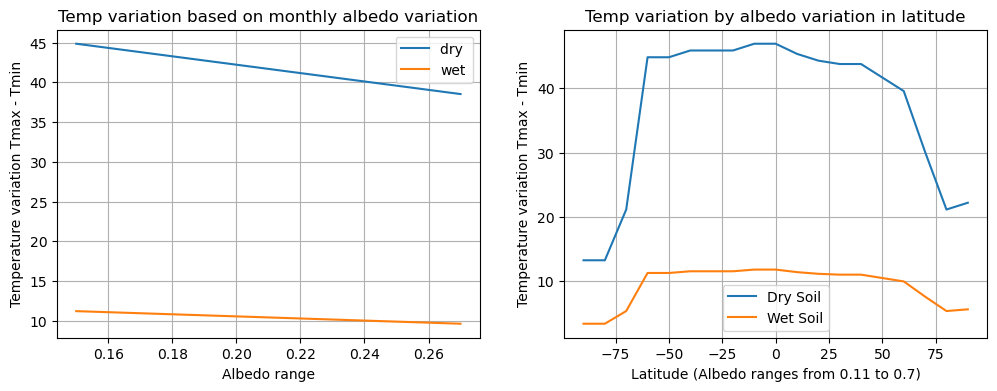

In [18]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(a, T_a_var_dry, label = 'dry ')
plt.plot(a, T_a_var_wet, label = 'wet')
plt.xlabel('Albedo range')
plt.ylabel('Temperature variation Tmax - Tmin')
plt.title('Temp variation based on monthly albedo variation')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lat, T_a_var_dry_l, label = 'Dry Soil')
plt.plot(lat, T_a_var_wet_l, label = 'Wet Soil')
plt.xlabel('Latitude (Albedo ranges from 0.11 to 0.7)')
plt.ylabel('Temperature variation Tmax - Tmin')
plt.title('Temp variation by albedo variation in latitude')
plt.grid()
plt.legend()
plt.show()